In [1]:
import nltk

<h1>Reading in a Text Corpus</h1>

In [2]:
from nltk.corpus import PlaintextCorpusReader

In [3]:
# identify the root folder where texts are stored
corpus_root = '/Users/asg/Dropbox/00-UCLA/Courses/DH150-TextAnalysis/plain_text'

In [4]:
# "Read" the list of files
filelist = PlaintextCorpusReader(corpus_root, '.*')

In [5]:
# list file names in root folder
filelist.fileids()

['1609_CaptHarris_pirate_confessions.txt',
 '1609_play_CaptWard.txt',
 '1617_Pirate_Attack_on_Dolphin.txt',
 '1640_7-Years_Slavery_Under_Turks.txt',
 '1666_DAranda_Captive_Narrative_Algiers.txt',
 '1713_Proclamation_Brit_Trading_Passes.txt',
 '1737_OldBailey_piracy_trial.txt',
 '1818_Captive_Narrative_Algiers-partially_cleaned.txt',
 'Document authentique et inédit concernant le partage des captures amenées par les corsaires algériens_par Albert Devoulx.txt',
 'Le raïs Hamidou - notice biographique sur le plus célèbre corsaire algérien du XIIIe siècle.txt',
 'Works_of_FormerPirate_Henry_Mainwaring.txt']

<h1>Single Document Analysis</h1>

Let's begin by exploring just one document and its word frequencies.

In [6]:
# Use words function to create a words list from a single file
wordslist = filelist.words('1737_OldBailey_piracy_trial.txt')

# 'sents' is a method from PlaintextCorpusReader that reads in sentences from a document or corpus
# 'paras' is a method from the same that reads in paragraphs

In [7]:
# Begin to explore words in the text
# If you're interested in longer words that may carry more meaning, say words longer than three letters
filtered_words = [w for w in set(wordslist) if len(w) > 3]
#filtered_words

In [8]:
from nltk.probability import FreqDist

# Calculate the frequency distribution of all words
fdist = FreqDist(wordslist)
fdist

FreqDist({',': 776, 'the': 489, '.': 443, 'and': 333, "'": 185, 'to': 175, 'was': 172, 'of': 150, 'I': 150, ';': 136, ...})

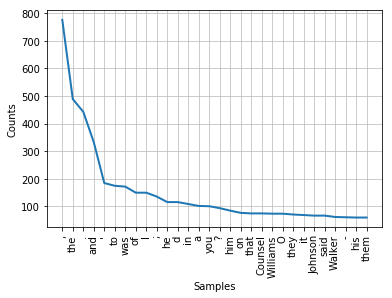

In [14]:
# Plot the frequency distribution of the top 30 words. 

fdist.plot(30)

<h2>Zipf's Law</h2>

This is why we want to remove stopwords. We are much more interested in words with much lower frequencies than "the", "and", or "to". Removing stopwords allows us to filter out this very high frequency words to focus on words that are likely to be more meaningful. 

One quick way to filter words without a stopwords list specified is to filter on length as we did above. Notice how the graph changes and which words appear when we filter on length.

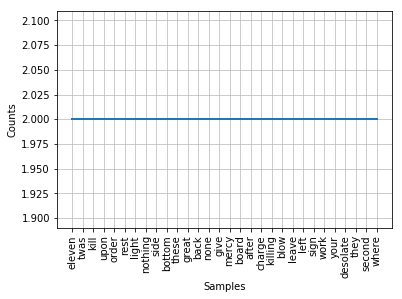

In [16]:
fdist_2 = FreqDist(word.lower() for word in set(filtered_words))

fdist_2.plot(30)


In [17]:
# Uncomment the following line by removing the hash symbol at the start of the line and running the code
# help(FreqDist)

<h1> Preprocessing text files for analysis</h1>

We've begun to get a sense for why we need to use some sort of filtration method for our word list. In the last step, you will notice that we also use a method called "lower" to convert all of the text to lowercase so that all instances of a word will be grouped together whether that word is lower or upper case. This is generally the first step in preprocessing a document before we begin analysis. Here is an outline of usual procedures to prepare our text:

<ol>
    <li>Tokenize text by paragraphs, sentences, or words (usually by words)</li>
    <li>Convert all tokens to lower case</li>
    <li>Remove stopwords</li>
    <li><em>Optional:</em> Use a "stemmer" to chop off word endings to group words with the same meaning together (flowery, flowering, flowers all reduce to flower, for example)</li>
    <li><em>Optional:</em> <b>Or</b> use a "lemmatizer" to reduce tokens to their root words, rather than simply lopping off the ends of words. This is more precise, but it take much longer to run.</li>
</ol>

<h2>0. Read in your document</h2>

In [18]:
#Read in your document with the open() function; the 'r' opens the file in "read" mode.

text = open('/Users/asg/Dropbox/00-UCLA/Courses/DH150-TextAnalysis/plain_text/1737_OldBailey_piracy_trial.txt', 'r').read()

# Uncomment the following line to see the document. Note that new line characters (\n) appear in the text.
# text.read()

<h2>1. Tokenize text</h2>

In [19]:
# Tokenize text 
from nltk import word_tokenize
tokenlist = word_tokenize(text)

# Find out how many tokens there are in the document with the length (len()) method
print(len(tokenlist))

#Determine the type of object we've created with the tokenlist
type(tokenlist)

9212


list

<h3>Strings and lists</h3>

<h4>The Difference between Lists and Strings:</h4> Strings and lists are both kinds of sequence. We can pull them apart by indexing and slicing them, and we can join them together by concatenating them. However, we cannot join strings and lists.

<h4>Why does this matter?</h4> 
When we open a file for reading into a Python program, we get a string corresponding to the contents of the whole file. If we use a for loop to process the elements of this string, all we can pick out are the individual characters — we don't get to choose the granularity. By contrast, the elements of a list can be as big or small as we like: for example, they could be paragraphs, sentences, phrases, words, characters. So lists have the advantage that we can be flexible about the elements they contain, and correspondingly flexible about any downstream processing. Consequently, one of the first things we are likely to do in a piece of NLP code is tokenize a string into a list of strings (3.7). Conversely, when we want to write our results to a file, or to a terminal, we will usually format them as a string (3.9). [References point to NLTK Book](https://www.nltk.org/book/ch03.html)

In [21]:
# We can sort the list of words with sorted()

vocab = sorted(set(tokenlist))

#Check the first four tokens in the sorted list
vocab[0:4]

['!', '&', "'", "'T"]

<h2>2. Lowercase conversion</h2>

In [22]:
# Convert text to lowercase

words = [w.lower() for w in tokenlist]

#Check the first four words in our list
words[0:4]

['old', 'bailey', 'proceedings', 'online']

<h2>3. Remove stopwords</h2>

In [23]:
from nltk.corpus import stopwords

#View stopwords in the English stopwords list
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Notice that numbers and punctuation are not included in the stopwords list.

In [24]:
#Remove stopwords by selecting all words that are not in the stopwords list. 

filtered = [w for w in words if w not in stopwords.words("english")]
filtered[0:10]

['old',
 'bailey',
 'proceedings',
 'online',
 '(',
 'www.oldbaileyonline.org',
 ',',
 'version',
 '8.0',
 ',']

In [25]:
#Download punkt tokenizer to remove punctuation (only need to do this step once)
#nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/asg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#Keep only alpha-numeric tokens with word.isalnum() from punkt
words = [word for word in filtered if word.isalnum()]

<h2>4. Text Normalization</h2>
In this tutorial, we won't get into stemming and lemmatization, as this an optional step in text preparation. If you decide this would be helpful as you work with your documents, see [NLTK: A Beginners Hands-on Guide to Natural Language Processing](https://www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/). 

<hr/>

<h1>Word Frequency Analysis</h1>

To begin, we will need to install two new libraries if you don't already have them: 
<ul>
    <li>matplotlib is a data visualization library</li>
    <li>wordcloud is a wordcloud generator</li>
</ul>


In [ ]:
#!pip3 install matplotlib
#!pip3 install wordcloud

In [27]:
#import the necessary packages from the libraries you just installed

from matplotlib import pyplot as plt

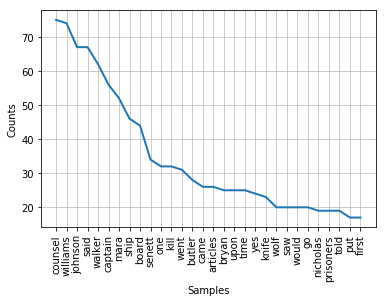

In [28]:
# Begin by a exploring a new line chart of the word frequency distribution after our pre-processing
fd = FreqDist(words)
fd.plot(30)
plt.show()

Now we have reduced our word list to just those that are likely to have more meaning. 

If the words that appear here are still not satisfactory, you can also use the extended stopwords list available in NLTK or add your own. 

To add your own, try the following code:

    more_stopwords = """with some your just have from it's /via &amp; that they your there this into providing would can't"""
    stoplist += more_stopwords.split()

In [34]:
import pprint

#Convert word list to a single string
clean_words_string = " ".join(words)

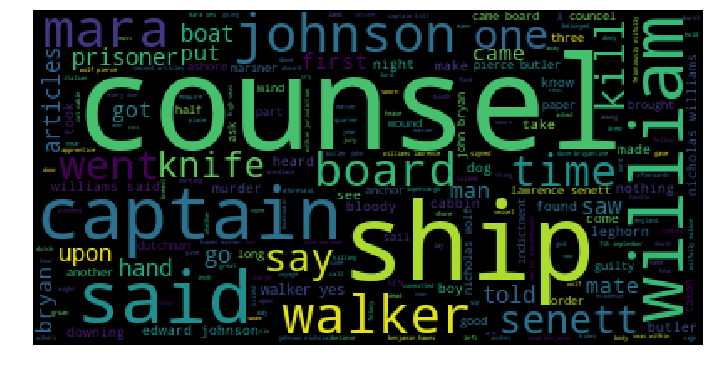

In [37]:
#generate a basic wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

<h1>Simple Concordance and Collocations Methods</h1>

<h2>Converting from list to Text type in NLTK</h2>

In [30]:
#To be able to use methods like concordance and collocations, convert the token list to nltk's "Text" type
textcontent = nltk.Text(tokenlist)
textcontent 

<Text: Old Bailey Proceedings Online ( www.oldbaileyonline.org , version...>

In [31]:
textcontent.concordance('piracy')

Displaying 2 of 2 matches:
 Killing > murder , Miscellaneous > piracy , 24th February 1737 . Edward Johns
mselves . I will not touch upon the Piracy , that will come under your Conside


In [32]:
#Get a list of top collocations in the document
textcontent.collocations()

Edward Johnson; Benjamin Hawes; Pierce Butler; Lawrence Senett;
otherwise O'Bryan; John Bryan; Nicholas Williams; Dove Brigantine;
High Seas; Nicholas Wolf; Malice aforethought; second Articles; said
Benjamin; mortal Wound; weighing Anchor; every one; Jurisdiction
aforesaid; Companion Ladder; upon Deck; February 1737
